In [2]:
# Uncomment to upgrade packages
# !pip install pandas --upgrade --user --quiet
# !pip install numpy --upgrade --user --quiet
# !pip install scipy --upgrade --user --quiet
# !pip install statsmodels --upgrade --user --quiet
# !pip install scikit-learn --upgrade --user --quiet
# !pip install --upgrade --quiet pillow
# !pip install --upgrade --quiet scikit-learn
# !pip install --upgrade --quiet lime

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

In [4]:
data = pd.read_csv("./data/genres_v2.csv")

In [5]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.420,0.060,1.340e-02,0.056,0.389,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.079,0.401,0.000e+00,0.118,0.124,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.062,0.014,4.140e-06,0.372,0.039,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.103,0.024,0.000e+00,0.114,0.175,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.293,0.217,0.000e+00,0.166,0.591,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

The column called Unnamed we remove since contains 21525 null values and it behaves as the index of the title feature. Moreover, we also combine title with song_name since whenever song_name is empty title has a value, and both have the same rol

In [7]:
title = data['title'].fillna(data['song_name'])
data = data.drop(columns=['Unnamed: 0','title','song_name'])
data['title'] = title

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [9]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,title
0,0.831,0.814,2,-7.364,1,0.420,5.980e-02,1.340e-02,0.056,0.389,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.079,4.010e-01,0.000e+00,0.118,0.124,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.062,1.380e-02,4.140e-06,0.372,0.039,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.103,2.370e-02,0.000e+00,0.114,0.175,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.293,2.170e-01,0.000e+00,0.166,0.591,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.030,3.150e-02,3.450e-04,0.121,0.394,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.048,2.250e-02,1.820e-05,0.205,0.383,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.051,2.600e-02,2.420e-04,0.385,0.124,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.039,5.510e-04,2.960e-02,0.058,0.488,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,Euphoric Hardstyle


In [11]:
# print(data.describe().to_latex())
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000,4.230e+04,42305.000,42305.000,42305.000,42305.000,4.230e+04,42305.000,42305.000,42305.000,42305.000,42305.000,42305.000
mean,0.639,7.625e-01,5.370,-6.465,0.549,0.137,9.616e-02,0.283,0.214,0.357,147.474,250865.847,3.973
std,0.157,1.838e-01,3.666,2.941,0.498,0.126,1.708e-01,0.371,0.176,0.233,23.845,102957.714,0.268
min,0.065,2.430e-04,0.000,-33.357,0.000,0.023,1.070e-06,0.000,0.011,0.019,57.967,25600.000,1.000
25%,0.524,6.320e-01,1.000,-8.161,0.000,0.049,1.730e-03,0.000,0.100,0.161,129.931,179840.000,4.000
50%,0.646,8.030e-01,6.000,-6.234,1.000,0.075,1.640e-02,0.006,0.135,0.322,144.973,224760.000,4.000
75%,0.766,9.230e-01,9.000,-4.513,1.000,0.193,1.070e-01,0.722,0.294,0.522,161.464,301133.000,4.000
max,0.988,1.000e+00,11.000,3.148,1.000,0.946,9.880e-01,0.989,0.988,0.988,220.290,913052.000,5.000


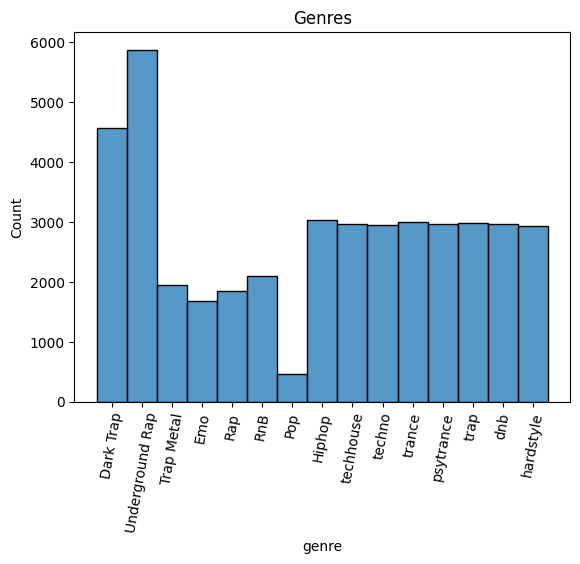

In [14]:
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=80)
_ = plt.title("Genres")

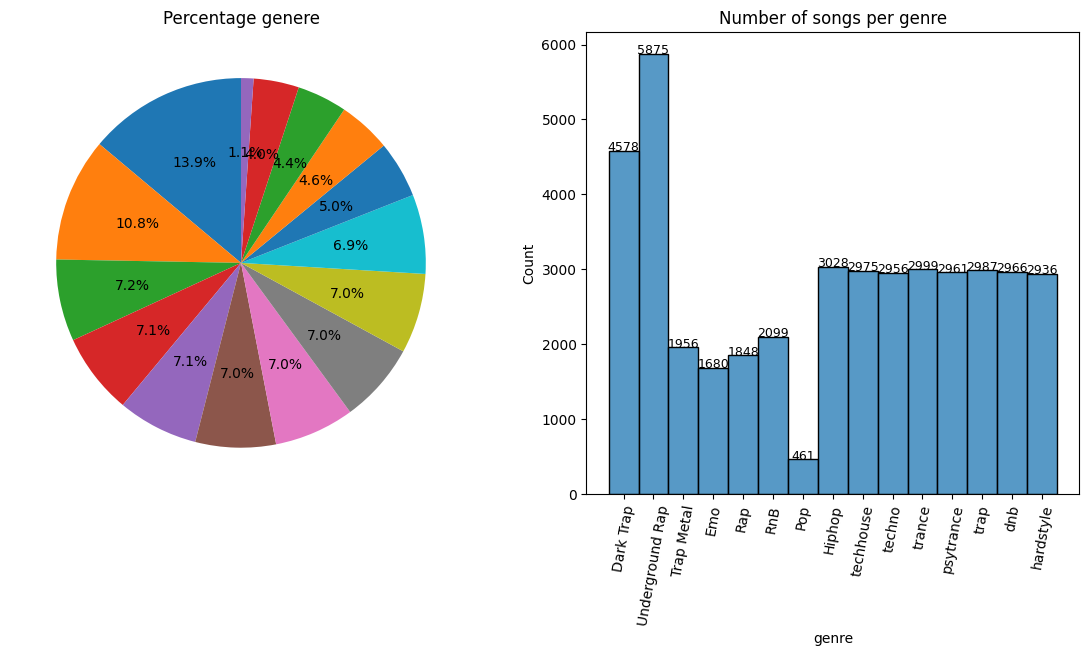

In [19]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.pie(data['genre'].value_counts(), autopct = "%1.1f%%", startangle = 90)
t1 = ax1.set_title('Percentage genere')

sns.histplot(data["genre"],ax =ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=80)
t2 = ax2.set_title('Number of songs per genre')
# show count (+ annotate)
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 9)


plt.show();

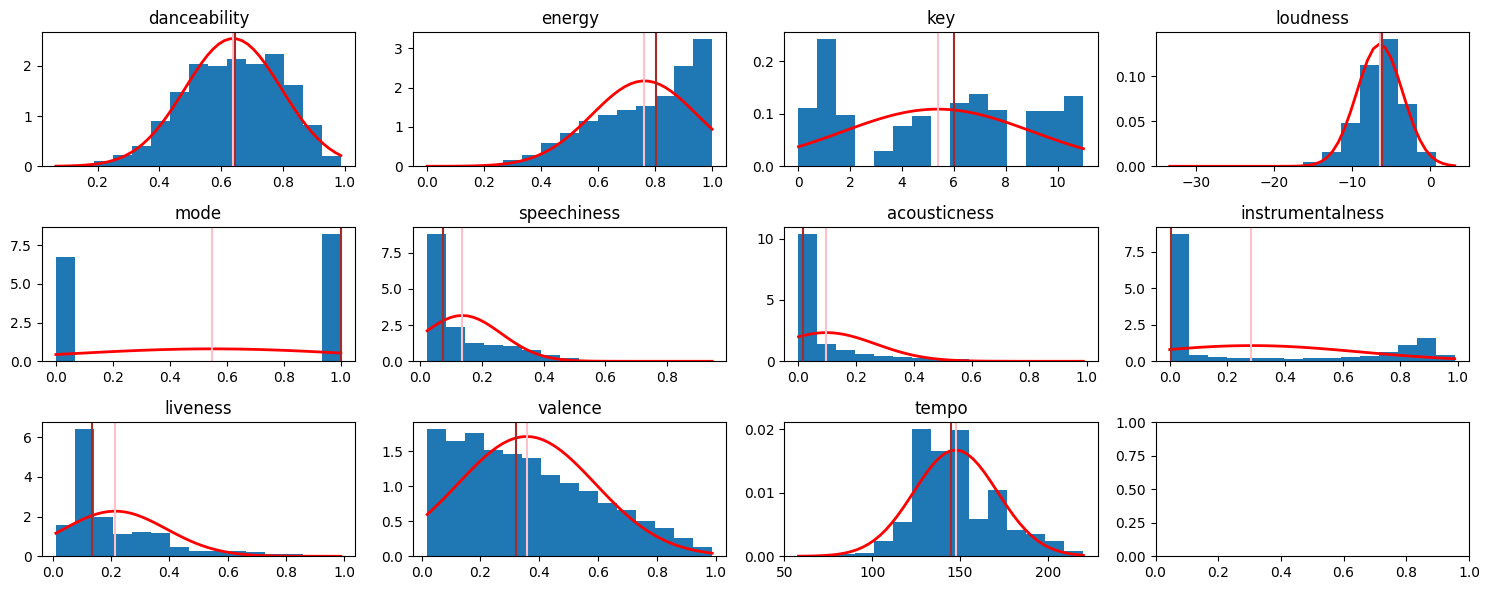

In [21]:
fig, axes = plt.subplots(3,4,figsize=(15,6))

# We will not plot the target
for i, c in enumerate(data.columns[:11]):
    ax = axes.reshape(-1)[i]
    count, bins, ignore = ax.hist(data[c], 15, density=True)
    sigma=  data[c].std()
    mu=  data[c].mean()
    dbins = np.linspace(bins[0], bins[-1])
    ax.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (dbins - mu)**2
                         / (2 * sigma**2) ), linewidth=2, color='red')
    ax.axvline(data[c].mean(),color='pink')
    ax.axvline(data[c].median(),color='brown')

    t = ax.set_title(c)
plt.tight_layout()